<a href="https://colab.research.google.com/github/Meowmixforme/Kaggle_Machine_Learning_Projects/blob/main/Project%205%20Image%20super-resolution%20using%20Deep%20Learning/Super_Resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import sys
import keras
import cv2
import numpy
import matplotlib
import skimage

print('Python: {}'.format(sys.version))
print('keras: {}'.format(keras.__version__))
print('cv2: {}'.format(cv2.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('skimage: {}'.format(skimage.__version__))

Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
keras: 3.8.0
cv2: 4.11.0
numpy: 2.0.2
matplotlib: 3.10.0
skimage: 0.25.2


In [57]:
# import necessary packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.optimizers import Adam
from skimage.metrics import structural_similarity as ssim
from matplotlib import pyplot as plt
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr

import inspect
import cv2
import numpy as np
import math
import os
import requests

# python magic function (makes graphs/images plot in notebook and not pop up window)
%matplotlib inline

In [48]:
#define a function to peak signal to noise ratio PNSR ( had to add channel_axis=-1)

def psnr(target, ref):

    # assume RGB image
    target_data = target.astype(float)
    ref_data = ref.astype(float)

    diff = ref_data - target_data
    diff = diff.flatten('C')

    rmse = math.sqrt(np.mean(diff ** 2.))

    return 20 * math.log10(255. / rmse)

# define function for mean squared error (MSE)
def mse(target, ref):
    # the MSE between the two images is the sum of the squared difference between the two images
    err = np.sum((target.astype('float') - ref.astype('float')) ** 2)
    err /= float(target.shape[0] * target.shape[1])

    return err

# define function that combines all three image quality metrics
def compare_images(target, ref):
    scores = []
    scores.append(psnr(target, ref))
    scores.append(mse(target, ref))
    scores.append(ssim(target, ref, channel_axis=-1, multichannel =True))

    return scores

https://mmlab.ie.cuhk.edu.hk/projects/SRCNN.html

In [49]:
# Download the images from github repo

# List of all the image filenames from my repo
image_files = [
    "baboon.bmp", "baby_GT.bmp", "barbara.bmp", "bird_GT.bmp", "butterfly_GT.bmp",
    "coastguard.bmp", "comic.bmp", "face.bmp", "flowers.bmp", "foreman.bmp",
    "head_GT.bmp", "lenna.bmp", "monarch.bmp", "pepper.bmp", "ppt3.bmp",
    "woman_GT.bmp", "zebra.bmp"
]

# GitHub raw URL base
base_url = "https://raw.githubusercontent.com/Meowmixforme/Kaggle_Machine_Learning_Projects/main/Project%205%20Image%20super-resolution%20using%20Deep%20Learning/source/"

os.makedirs("source", exist_ok=True)

for image in image_files:
    url = base_url + image
    response = requests.get(url)
    if response.status_code == 200:
        with open(f"source/{image}", "wb") as f:
            f.write(response.content)
        print(f"Downloaded {image}")
    else:
        print(f"Failed to download {image} (status code: {response.status_code})")

Downloaded baboon.bmp
Downloaded baby_GT.bmp
Downloaded barbara.bmp
Downloaded bird_GT.bmp
Downloaded butterfly_GT.bmp
Downloaded coastguard.bmp
Downloaded comic.bmp
Downloaded face.bmp
Downloaded flowers.bmp
Downloaded foreman.bmp
Downloaded head_GT.bmp
Downloaded lenna.bmp
Downloaded monarch.bmp
Downloaded pepper.bmp
Downloaded ppt3.bmp
Downloaded woman_GT.bmp
Downloaded zebra.bmp


In [50]:
# testing the generated images using the image quality metrics

# Legacy PSNR implementation compatible with older scikit-image
def psnr(target, ref):
    diff = target.astype(np.float64) - ref.astype(np.float64)
    rmse = np.sqrt(np.mean(diff ** 2.))
    if rmse == 0:
        return float('inf')
    return 20 * np.log10(255. / rmse)

def compare_images(target, ref):
    psnr_score = psnr(ref, target)
    mse_score = mse(ref, target)
    ssim_score = ssim(ref, target, channel_axis=-1)
    return psnr_score, mse_score, ssim_score

source_dir = 'source/'
# If you have another directory of processed/generated images, set it here:
# compare_dir = 'processed/'  # for example

if not os.path.exists(source_dir):
    print(f"Directory '{source_dir}' does not exist. Please check your setup.")
else:
    for file in os.listdir(source_dir):
        target = cv2.imread(os.path.join(source_dir, file))
        ref = cv2.imread(os.path.join(source_dir, file))
        if target is None or ref is None:
            print(f"Could not read {file} in one of the directories, skipping.")
            continue
        scores = compare_images(target, ref)
        psnr_disp = "inf" if scores[0] == float('inf') else f"{scores[0]}"
        print(f'{file}\nPSNR: {psnr_disp}\nMSE: {scores[1]}\nSSIM: {scores[2]}\n')


pepper.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

woman_GT.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

head_GT.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

flowers.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

barbara.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

foreman.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

coastguard.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

lenna.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

baboon.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

monarch.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

face.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

butterfly_GT.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

comic.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

ppt3.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

zebra.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

baby_GT.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0

bird_GT.bmp
PSNR: inf
MSE: 0.0
SSIM: 1.0



In [51]:
# Defining SRCNN Model

def model():
    # define model type
    SRCNN = Sequential()

    # add model layers
    SRCNN.add(Conv2D(filters=128, kernel_size=(9, 9), kernel_initializer='glorot_uniform',
                     activation='relu', padding='valid', use_bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(filters=64, kernel_size=(3, 3), kernel_initializer='glorot_uniform',
                     activation='relu', padding='same', use_bias=True))
    SRCNN.add(Conv2D(filters=1, kernel_size=(5, 5), kernel_initializer='glorot_uniform',
                     activation='linear', padding='valid', use_bias=True))

    # define optimizer with correct argument
    adam = Adam(learning_rate=0.0003)

    # compile model
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])

    return SRCNN

https://github.com/MarkPrecursor/SRCNN-keras

pre trained weights

In [52]:
# define necessary image processing functions

def modcrop(img, scale):
    tmpsz = img.shape
    sz = tmpsz[0:2]
    sz = sz - np.mod(sz, scale)
    img = img[0:sz[0], 1:sz[1]]
    return img

def shave(image, border):
    img = image[border: -border, border: - border]
    return img

In [53]:
# Definine main prediction function

def compare_images(target, ref):
    psnr_args = inspect.getfullargspec(psnr).args
    if 'data_range' in psnr_args:
        psnr_score = psnr(ref, target, data_range=ref.max() - ref.min())
    else:
        psnr_score = psnr(ref, target)
    mse_score = mse(ref, target)
    ssim_score = ssim(ref, target, channel_axis=-1)
    return psnr_score, mse_score, ssim_score

def predict(image_path):
    # load the srcnn model with weights
    srcnn = model()
    srcnn.load_weights('3051crop_weight_200.h5')

    # load the degraded and reference images
    path, file = os.path.split(image_path)
    degraded = cv2.imread(image_path)
    ref = cv2.imread('source/{}'.format(file))

    # preprocess the image with modcrop
    ref = modcrop(ref, 3)
    degraded = modcrop(degraded, 3)

    # convert the image to YCrCb - (srcnn trained on Y channel)
    temp = cv2.cvtColor(degraded, cv2.COLOR_BGR2YCrCb)

    # create image slice and normalise
    Y = np.zeros((1, temp.shape[0], temp.shape[1], 1), dtype=float)
    Y[0, :, :, 0] = temp[:, :, 0].astype(float) / 255

    # perform super-resolution with srcnn
    pre = srcnn.predict(Y, batch_size=1)

    # post-process output
    pre *= 255
    pre[pre > 255] = 255
    pre[pre < 0] = 0
    pre = pre.astype(np.uint8)

    # copy Y channel back to image and convert to BGR
    temp = shave(temp, 6)
    temp[:, :, 0] = pre[0, :, :, 0]
    output = cv2.cvtColor(temp, cv2.COLOR_YCrCb2BGR)

    # remove border from reference and degraded image
    ref = shave(ref.astype(np.uint8), 6)
    degraded = shave(degraded.astype(np.uint8), 6)

    # image quality calculations
    scores = []
    scores.append(compare_images(degraded, ref))
    scores.append(compare_images(output, ref))

    # return images and scores
    return ref, degraded, output, scores

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
Degraded Image: 
PSNR: inf
MSE: 0.0
SSIM: 1.0

Reconstructed Image: 
PSNR: 24.688558083094673
MSE: 220.91466800963778
SSIM: 0.8369035684278594



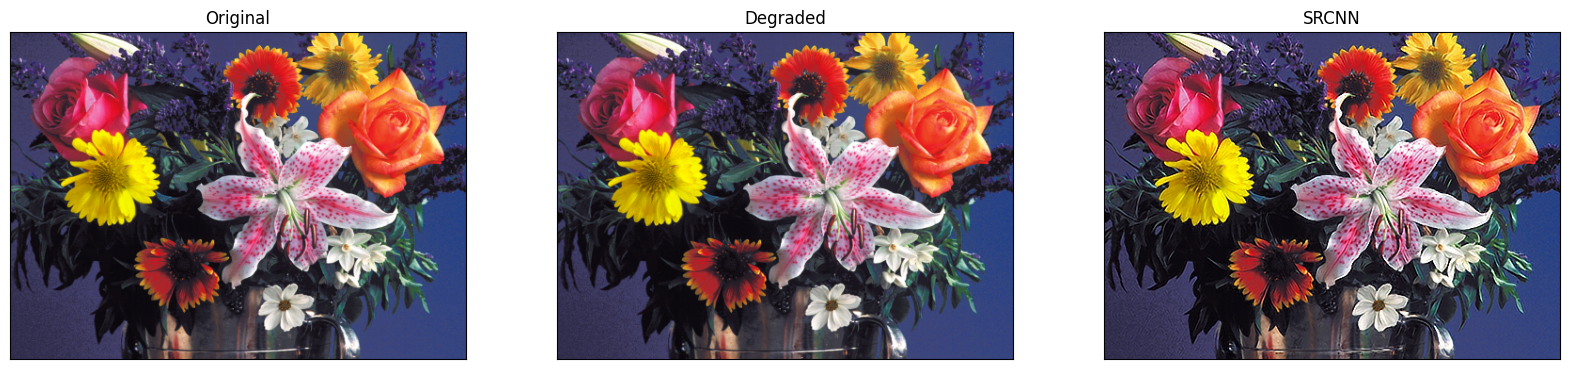

In [58]:
ref, degraded, output, scores = predict('source/flowers.bmp')

#print all scores for all images
print('Degraded Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0][0], scores[0][1], scores[0][2]))
print('Reconstructed Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[1][0], scores[1][1], scores[1][2]))

# display images as subplots
fig, axs = plt.subplots(1, 3, figsize = (20, 8))
axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
axs[1].set_title('Degraded')
axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[2].set_title('SRCNN')

# remove the x and y tick marks
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])